# Project | Statistical NLP
## Blog Authorship Corpus




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
input_file_path = '/content/drive/My Drive/1.Dataset/Blog_Authorship_Corpus/blogtext.csv'

In [0]:
# Load the input into a dataframe
df = pd.read_csv(input_file_path)

In [9]:
print('shape of the dataset {}'.format(df.shape))

shape of the dataset (681284, 7)


In [10]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


### EDA

In [12]:
# Characters such as empty strings '' or numpy.inf are not considered NA values unless the below is flag is set
pd.options.mode.use_inf_as_na = True

df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

Bloggers Age details:
	 Unique nos 	 26
	 Min age of blogger is 	 13
	 Max age of blogger is 	 48
	 Unique values are 	 [15 33 14 25 17 23 37 26 24 27 45 34 41 44 16 39 35 36 46 42 13 38 43 40
 47 48]


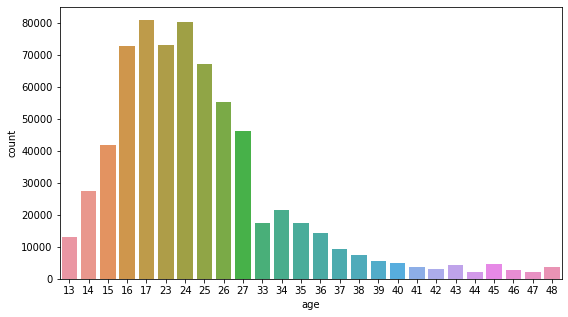

In [13]:
print('Bloggers Age details:')
print('\t Unique nos \t', format(df['age'].nunique()))
print('\t Min age of blogger is \t', format(min(df['age'])))
print('\t Max age of blogger is \t', format(max(df['age'])))
print('\t Unique values are \t', format(df['age'].unique()))

fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.countplot(x=df['age'],ax=ax)
plt.show()

Form the dataset, it seems mostly people aged between ~14 & 37 have written, contributed

Also, it can be observed that contribution or writing blogs starts decreasing by age (~ age 35 onwards)

Bloggers Gender details:
	 Unique nos 	 2
	 Unique values are 	 ['male' 'female']


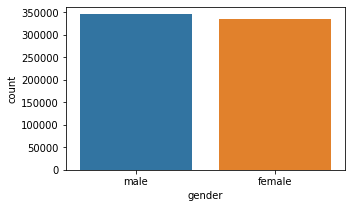

In [14]:
print('Bloggers Gender details:')
print('\t Unique nos \t', format(df['gender'].nunique()))
print('\t Unique values are \t', format(df['gender'].unique()))

fig, ax = plt.subplots(1,1, figsize=(5,3))
sns.countplot(x=df['gender'],ax=ax)
plt.show()

Topic details:
	 Unique nos of Topics 	 40
	 Unique values are 	 ['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']


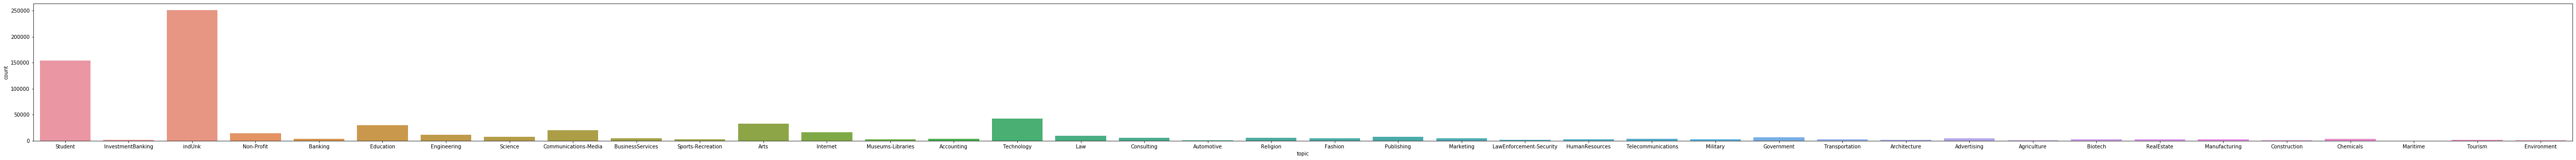

In [15]:
print('Topic details:')
print('\t Unique nos of Topics \t', format(df['topic'].nunique()))
print('\t Unique values are \t', format(df['topic'].unique()))

fig, ax = plt.subplots(1,1, figsize=(90,5))
sns.countplot(x=df['topic'],ax=ax)
plt.show()

It seems bloggers have contributed mostly for the topics such as 'student', 'technology' & 'indUnk'

Bloggers Astro-sign details:
	 Unique nos of sign 	 12
	 Unique values are 	 ['Leo' 'Aquarius' 'Aries' 'Capricorn' 'Gemini' 'Cancer' 'Sagittarius'
 'Scorpio' 'Libra' 'Virgo' 'Taurus' 'Pisces']


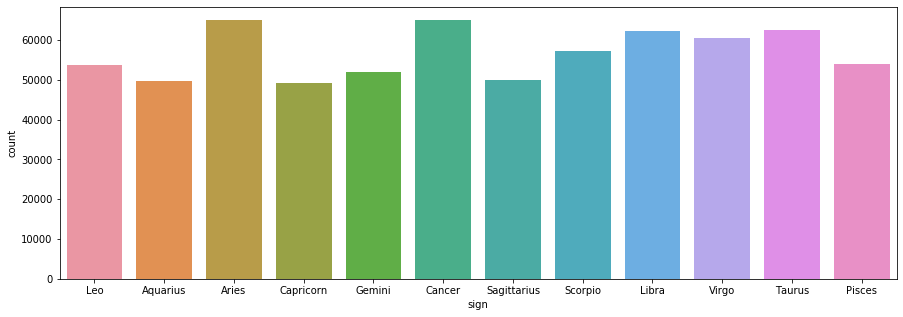

In [16]:
print('Bloggers Astro-sign details:')
print('\t Unique nos of sign \t', format(df['sign'].nunique()))
print('\t Unique values are \t', format(df['sign'].unique()))

fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.countplot(x=df['sign'],ax=ax)
plt.show()

It seems bloggers born in Cancer astro-sign had contributed more than others...!

Time details:
	 Unique nos of years 	 9
	 Unique values are 	 ['2004' '2002' '2003' '1999' '2000' '2001' '2006' '2005' '']


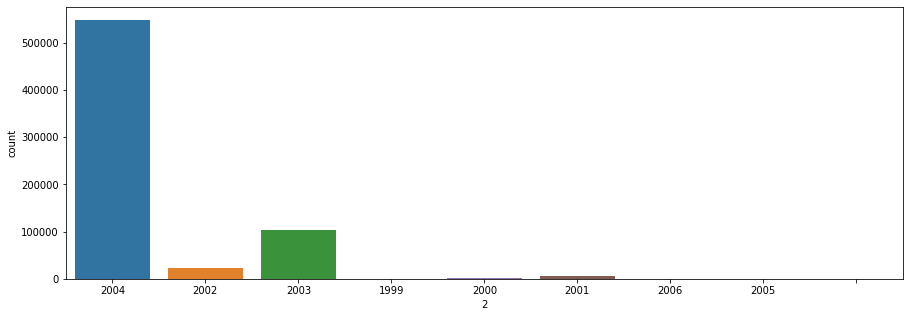

In [17]:
date = df['date'].str.rpartition(',')

print('Time details:')
print('\t Unique nos of years \t', format(date[2].nunique()))
print('\t Unique values are \t', format(date[2].unique()))

fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.countplot(x=date[2],ax=ax)
plt.show()

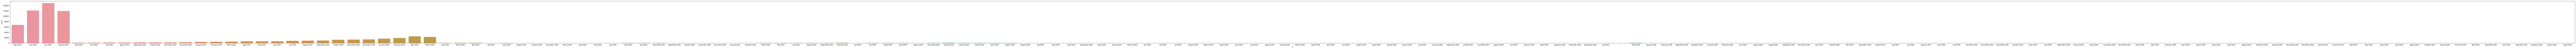

In [18]:
date = df['date'].str.partition(',')

fig, ax = plt.subplots(1,1, figsize=(300,5))
sns.countplot(x=date[2],ax=ax)
plt.show()


In [19]:
df.pivot_table(index=['topic','gender'],values=['text'], aggfunc='count',).replace(np.nan,'').T

topic  Accounting      Advertising        ... Transportation        indUnk        
gender     female male      female  male  ...         female  male  female    male
text         3227  605        2363  2313  ...            670  1656  146059  104956

[1 rows x 80 columns]

For topics, such as 'Automotive, 'Media, 'Engineering' etc... male gender had contributed more than the female gender. Also there are topics where female has contributed more (in terms of blogs count) such as 'Accounting', 'Marketing', 'Museum' etc...!

In [20]:
df.pivot_table(index=['age'],columns=['topic'],values=['text'], aggfunc='count').replace(np.nan,'').T

age                             13     14     15     16  ...    45   46   47    48
     topic                                               ...                      
text Accounting                               75     79  ...    16  988   22      
     Advertising                11            21     12  ...    78   12  245      
     Agriculture                       73     85    119  ...              14      
     Architecture                      33     68     13  ...                    11
     Arts                      167   1205   1313   2249  ...   105   63  240     4
     Automotive                        28     29     14  ...     2   25           
     Banking                     2                   17  ...                    12
     Biotech                   109    136    285    131  ...                      
     BusinessServices                  14     18    184  ...         10  392      
     Chemicals                  21     32    369    522  ...                      
     Communications-Media        8    227    151   1221  ...    40   45   55   277
     Construction                              3     29  ...    12   15         15
     Consulting                425    124            20  ...    18  538  107    47
     Education                 370   1185   1547   1115  ...   433   55   47    83
     Engineering                              13    117  ...    48    9   13      
     Environment                       83      4      9  ...     5                
     Fashion                     5     22    118    307  ...    14               3
     Government                  4     19    262     49  ...   163   96         90
     HumanResources                   345     67     94  ...     2               8
     Internet                  346    138    135    249  ...  1023   11  121    39
     InvestmentBanking                        18     67  ...                      
     Law                         9      6     47     60  ...    65   32   24     7
     LawEnforcement-Security           23     99     84  ...                      
     Manufacturing              22                    3  ...    14   32    9      
     Maritime                           7     28     27  ...               3    13
     Marketing                                       15  ...    27             108
     Military                   96    146    152    191  ...                   107
     Museums-Libraries          30     91     37     67  ...    10        70   315
     Non-Profit                130    340    878    428  ...   248   14    5    26
     Publishing                               24     72  ...   294   11         58
     RealEstate                  3            72      5  ...              44      
     Religion                    4     30    147    543  ...    51        88    42
     Science                   291     53    185    120  ...         13           
     Sports-Recreation          10     48    167    233  ...                      
     Student                  5310  13491  20681  40077  ...    36        21     4
     Technology                154    129    351   2233  ...   805   52   69    39
     Telecommunications         15     50           162  ...     4              13
     Tourism                            5     46    177  ...                    27
     Transportation                    18     13     42  ...         46    1      
     indUnk                   5591   9299  14259  21552  ...   969  666  617  2224

[40 rows x 26 columns]

## Process 'Text' column

In [21]:
pd.DataFrame(df['topic'].value_counts()).T

,indUnk,Student,Technology,Arts,Education,Communications-Media,Internet,Non-Profit,Engineering,Law,Publishing,Science,Government,Consulting,Religion,Fashion,Marketing,Advertising,BusinessServices,Banking,Chemicals,Telecommunications,Accounting,Military,Museums-Libraries,Sports-Recreation,HumanResources,RealEstate,Transportation,Manufacturing,Biotech,Tourism,LawEnforcement-Security,Architecture,InvestmentBanking,Automotive,Agriculture,Construction,Environment,Maritime
topic,251015,153903,42055,32449,29633,20140,16006,14700,11653,9040,7753,7269,6907,5862,5235,4851,4769,4676,4500,4049,3928,3891,3832,3128,3096,3038,3010,2870,2326,2272,2234,1942,1878,1638,1292,1244,1235,1093,592,280


## As the dataset is large, use fewer rows

In [0]:
df_sample = df.sample(frac=0.03, random_state=3, axis=0)

In [23]:
df_sample.shape

(20439, 7)

In [24]:
df_sample.head(5)

,id,gender,age,topic,sign,date,text
543050,3462927,female,33,Arts,Scorpio,"01,June,2004",urlLink Turning the Tide: Hu...
677080,1583261,female,16,Arts,Gemini,"02,August,2004","Mistress, you've done nothing wrong, unless..."
200748,3809752,male,23,Student,Aries,"30,June,2004",Well another day of class has gone by a...
193630,3470844,female,26,indUnk,Libra,"04,August,2004","Yesterday, CostCo man met wit..."
301810,3393842,male,25,Technology,Virgo,"25,June,2004",Indian railways is making waves I t...


In [25]:
print(df_sample['age'].nunique())
print(df_sample['topic'].nunique())
print(df_sample['sign'].nunique())

26
40
12


In [26]:
pd.DataFrame(df_sample['topic'].value_counts()).T


,indUnk,Student,Technology,Arts,Education,Communications-Media,Non-Profit,Internet,Engineering,Law,Publishing,Government,Science,Consulting,Fashion,Religion,BusinessServices,Advertising,Marketing,Chemicals,Banking,Accounting,Military,Telecommunications,RealEstate,Sports-Recreation,HumanResources,Museums-Libraries,Transportation,Manufacturing,Biotech,Tourism,LawEnforcement-Security,Automotive,InvestmentBanking,Construction,Architecture,Agriculture,Environment,Maritime
topic,7551,4685,1203,1011,898,626,453,435,339,272,220,220,210,174,165,152,142,133,133,130,119,109,99,93,93,88,77,72,67,66,61,60,56,45,42,40,38,35,17,10


In [27]:
"""
for sen in df_sample['text']:
  blob = TextBlob(sen)
  lan = blob.detect_language()
  if lan != 'en':
    print(lan)
"""

"\nfor sen in df_sample['text']:\n  blob = TextBlob(sen)\n  lan = blob.detect_language()\n  if lan != 'en':\n    print(lan)\n"

In [0]:
# convert to lower cases
df_sample['cleanText']=df_sample['text'].map(lambda s: s.lower()) 

#remove unwanted char
df_sample['cleanText']=df_sample['cleanText'].map(lambda s: re.sub('[^a-z\' ]',"",s)) 


#remove unwanted spaces
df_sample['cleanText']=df_sample['cleanText'].map(lambda s: s.strip()) 

#remove stop-words
stop_words = stopwords.words('english')
df_sample['cleanText'] = df_sample['cleanText'].apply( lambda t : " ".join( word for word in t.split() 
                                                       if word not in stop_words ) )

In [0]:
# lemmatizer
#lemmatizer = WordNetLemmatizer()
#df_sample['cleanText'] = df_sample['cleanText'].apply( lambda t : " ".join( lemmatizer.lemmatize(word,pos='v') for word in t.split()) )
#df_sample['cleanText'] = df_sample['cleanText'].apply( lambda t : " ".join( lemmatizer.lemmatize(word,pos='n') for word in t.split()) )

## Create 'labels' columns by merging the other original columns

In [0]:
df_sample['labels'] = df_sample['gender'] + ',' + df_sample['age'].astype(str) + ',' + df_sample['topic'] + ',' + df_sample['sign']

In [0]:
df_sample['labels'] = df_sample['labels'].map(lambda s: s.split(','))

In [0]:
# reset the newly created sampled data-frame and drop the un-required columns/features
df_sample.reset_index(inplace=True)
df_sample.drop(columns=['id','gender','age','topic','sign','date','text','index'], inplace=True)

In [0]:
col_name = { 'cleanText':'text', 'labels':'labels'}
df_sample.rename(columns=col_name, inplace=True)

In [34]:
df_sample.head()

,text,labels
0,urllink turning tide humanitarian intervention...,"[female, 33, Arts, Scorpio]"
1,mistress done nothing wrong unless consider br...,"[female, 16, Arts, Gemini]"
2,well another day class gone little dumbfounded...,"[male, 23, Student, Aries]"
3,yesterday costco man met two beings planet ver...,"[female, 26, indUnk, Libra]"
4,indian railways making waves tell lalloo makin...,"[male, 25, Technology, Virgo]"


## Split the data-set

In [0]:
features = df_sample['text']
labels = df_sample['labels']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(features, labels, test_size=0.25, random_state=3)

In [37]:
print('Train shape {} {}'.format(x_train.shape, y_train.shape))
print('Test shape {} {}'.format(x_test.shape, y_test.shape))

Train shape (15329,) (15329,)
Test shape (5110,) (5110,)


## Vectorize the feature

In [0]:
# instantiate the vectorizer
vect = CountVectorizer(ngram_range=(1,2))

In [39]:
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [0]:
# learn training data vocabulary, then use it to create a document-term matrix
x_train_dtm = vect.fit_transform(x_train)

In [41]:
type(x_train_dtm)

scipy.sparse.csr.csr_matrix

In [42]:
print('shape of train document term matirx {}'.format(x_train_dtm.get_shape()))

shape of train document term matirx (15329, 1163782)


In [43]:
vect.get_feature_names()[:10]

['aa',
 'aa advert',
 'aa championship',
 'aa cheezy',
 'aa gayi',
 'aa gift',
 'aa grabbed',
 'aa group',
 'aa jeff',
 'aa later']

In [0]:
# transform testing data into a document-term matrix
x_test_dtm = vect.transform(x_test)

In [45]:
print('shape of test document term matirx {}'.format(x_test_dtm.get_shape()))

shape of test document term matirx (5110, 1163782)


### As the system crashes while executing, commenting the below piece of code

In [0]:
# examine the vocabulary and document-term matrix together
#pd.DataFrame(x_test_dtm.toarray(), columns=vect.get_feature_names()).head()

### Print the label value counts

In [0]:
all_labels = []

for sen in df_sample['labels']:
  for word in sen:
    all_labels.append(word)

In [48]:
pd.Series(all_labels).nunique()

80

In [49]:
pd.Series(all_labels).unique()

array(['female', '33', 'Arts', 'Scorpio', '16', 'Gemini', 'male', '23',
       'Student', 'Aries', '26', 'indUnk', 'Libra', '25', 'Technology',
       'Virgo', 'Museums-Libraries', 'Taurus', 'Cancer', '15', '24',
       'Sagittarius', 'Non-Profit', 'Sports-Recreation', 'Capricorn',
       '13', '17', 'Aquarius', '27', '47', 'Leo', 'Government', 'Law',
       '35', '14', 'Pisces', 'Education', '48', 'Communications-Media',
       'Marketing', 'RealEstate', 'Advertising', '36', 'Chemicals', '34',
       '44', 'Religion', 'Military', 'Science', '37',
       'LawEnforcement-Security', '40', 'Internet', 'Engineering',
       'Banking', 'Biotech', '43', 'Tourism', 'Manufacturing', '46',
       'Accounting', 'Fashion', '41', 'Publishing', '38', '45',
       'Maritime', 'BusinessServices', '39', 'Consulting', '42',
       'Telecommunications', 'Construction', 'InvestmentBanking',
       'Agriculture', 'Environment', 'Transportation', 'HumanResources',
       'Automotive', 'Architecture'], dtyp

In [0]:
label_dic = pd.Series(all_labels).value_counts().to_dict()

In [51]:
len(label_dic)

80

In [52]:
print(label_dic)

{'male': 10347, 'female': 10092, 'indUnk': 7551, 'Student': 4685, '17': 2478, '24': 2437, '16': 2194, '23': 2150, '25': 2015, 'Aries': 1959, 'Cancer': 1918, 'Libra': 1915, 'Taurus': 1855, 'Virgo': 1829, 'Scorpio': 1791, '26': 1639, 'Pisces': 1611, 'Leo': 1557, 'Gemini': 1530, 'Aquarius': 1504, 'Capricorn': 1500, 'Sagittarius': 1470, '27': 1358, '15': 1272, 'Technology': 1203, 'Arts': 1011, 'Education': 898, '14': 828, '34': 627, 'Communications-Media': 626, '35': 558, '33': 526, 'Non-Profit': 453, '36': 437, 'Internet': 435, '13': 395, 'Engineering': 339, '37': 280, 'Law': 272, '38': 237, 'Government': 220, 'Publishing': 220, 'Science': 210, 'Consulting': 174, 'Fashion': 165, 'Religion': 152, '40': 148, 'BusinessServices': 142, '39': 141, 'Marketing': 133, 'Advertising': 133, '43': 133, 'Chemicals': 130, 'Banking': 119, '45': 118, 'Accounting': 109, '48': 105, '41': 99, 'Military': 99, 'RealEstate': 93, 'Telecommunications': 93, 'Sports-Recreation': 88, '42': 77, 'HumanResources': 77, 

## Transform the labels

In [0]:
ml_binarizer = MultiLabelBinarizer()

In [0]:
mlb_y_train_indc = ml_binarizer.fit_transform(y_train)

In [55]:
type(mlb_y_train_indc)

numpy.ndarray

In [56]:
mlb_y_train_indc.shape

(15329, 80)

In [57]:
ml_binarizer.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [58]:
y_train.head()

6487                      [male, 25, Arts, Leo]
8585                [male, 17, Student, Gemini]
213          [female, 36, Manufacturing, Aries]
6398    [male, 14, Communications-Media, Virgo]
4599           [male, 23, Student, Sagittarius]
Name: labels, dtype: object

In [59]:
pd.DataFrame(mlb_y_train_indc, columns=ml_binarizer.classes_).head()

,13,14,15,16,17,23,24,25,26,27,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Accounting,Advertising,Agriculture,Aquarius,Architecture,Aries,Arts,Automotive,Banking,Biotech,BusinessServices,Cancer,Capricorn,Chemicals,Communications-Media,Construction,Consulting,Education,Engineering,Environment,Fashion,Gemini,Government,HumanResources,Internet,InvestmentBanking,Law,LawEnforcement-Security,Leo,Libra,Manufacturing,Maritime,Marketing,Military,Museums-Libraries,Non-Profit,Pisces,Publishing,RealEstate,Religion,Sagittarius,Science,Scorpio,Sports-Recreation,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
mlb_y_test_indc = ml_binarizer.transform(y_test)

In [61]:
mlb_y_test_indc.shape

(5110, 80)

In [62]:
y_test.head()

8946         [male, 36, Fashion, Aries]
4560       [female, 24, indUnk, Taurus]
13643        [male, 17, Student, Virgo]
7427            [male, 24, Arts, Aries]
3344     [female, 27, Education, Virgo]
Name: labels, dtype: object

In [63]:
pd.DataFrame(mlb_y_test_indc, columns=ml_binarizer.classes_).head()

,13,14,15,16,17,23,24,25,26,27,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Accounting,Advertising,Agriculture,Aquarius,Architecture,Aries,Arts,Automotive,Banking,Biotech,BusinessServices,Cancer,Capricorn,Chemicals,Communications-Media,Construction,Consulting,Education,Engineering,Environment,Fashion,Gemini,Government,HumanResources,Internet,InvestmentBanking,Law,LawEnforcement-Security,Leo,Libra,Manufacturing,Maritime,Marketing,Military,Museums-Libraries,Non-Profit,Pisces,Publishing,RealEstate,Religion,Sagittarius,Science,Scorpio,Sports-Recreation,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## Classification

In [0]:
lr = LogisticRegression(solver='lbfgs', max_iter=100000)
ovr =  OneVsRestClassifier(lr)

In [65]:
ovr.fit(x_train_dtm,mlb_y_train_indc)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [71]:
ovr.score(x_train_dtm, mlb_y_train_indc)

0.9080174832017744

In [66]:
ovr.score(x_test_dtm, mlb_y_test_indc)

0.0031311154598825833

In [0]:
y_predict = ovr.predict(x_test_dtm)

In [68]:
print(classification_report(mlb_y_test_indc,y_predict))

              precision    recall  f1-score   support

           0       0.45      0.05      0.08       108
           1       0.30      0.04      0.07       218
           2       0.34      0.04      0.08       305
           3       0.31      0.07      0.11       518
           4       0.34      0.08      0.13       623
           5       0.23      0.02      0.04       541
           6       0.30      0.04      0.07       624
           7       0.27      0.03      0.05       513
           8       0.27      0.01      0.03       406
           9       0.11      0.01      0.02       313
          10       0.00      0.00      0.00       117
          11       0.40      0.02      0.04       171
          12       0.55      0.04      0.08       142
          13       0.00      0.00      0.00       104
          14       0.25      0.01      0.03        68
          15       0.50      0.01      0.03        67
          16       0.25      0.03      0.05        34
          17       0.40    

### Print labels for few features

In [76]:
pd.DataFrame(y_predict, columns=ml_binarizer.classes_).head()

,13,14,15,16,17,23,24,25,26,27,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Accounting,Advertising,Agriculture,Aquarius,Architecture,Aries,Arts,Automotive,Banking,Biotech,BusinessServices,Cancer,Capricorn,Chemicals,Communications-Media,Construction,Consulting,Education,Engineering,Environment,Fashion,Gemini,Government,HumanResources,Internet,InvestmentBanking,Law,LawEnforcement-Security,Leo,Libra,Manufacturing,Maritime,Marketing,Military,Museums-Libraries,Non-Profit,Pisces,Publishing,RealEstate,Religion,Sagittarius,Science,Scorpio,Sports-Recreation,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [75]:
pd.DataFrame(mlb_y_test_indc, columns=ml_binarizer.classes_).head()

,13,14,15,16,17,23,24,25,26,27,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,Accounting,Advertising,Agriculture,Aquarius,Architecture,Aries,Arts,Automotive,Banking,Biotech,BusinessServices,Cancer,Capricorn,Chemicals,Communications-Media,Construction,Consulting,Education,Engineering,Environment,Fashion,Gemini,Government,HumanResources,Internet,InvestmentBanking,Law,LawEnforcement-Security,Leo,Libra,Manufacturing,Maritime,Marketing,Military,Museums-Libraries,Non-Profit,Pisces,Publishing,RealEstate,Religion,Sagittarius,Science,Scorpio,Sports-Recreation,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [0]:
#System creashes while executing it
#pd.DataFrame(x_test_dtm.toarray()).head()

### Inferences
* The model seems overfits as the accuracy for train is 90% whereas for test is very meager. 
* Though it was not asked as a part of assignment tried with & without lemmatizer yet the test accuracy was same
* For this project took 2 samples 3% & 30% of total 6L dataset for 3% the test acccuracy was less than 1% and 30% samples the test accuracy was 3% but yet quite low.
* Further trying to understand the ways for improving this imbalanced multi class/tag samples. Also. please share your comments if any to improve it.

Note: o/p of 30% sample piece code is not added in this notebook, as for any reasons if the sessions restarts then it takes more than couple of hours to fit those samples


### EOF